In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDRegressor
from  sklearn.preprocessing  import PolynomialFeatures
from  sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Data Preprocessing

In [2]:
missing_values = ["n/a", "na", "unknown"]
bank = pd.read_csv('bank-additional-full.csv', na_values = missing_values)
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Attribute Info
Bank client data:
1. Age (numeric)
2. Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
3. Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
4. Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
5. Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6. Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7. Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
8. Contact: contact communication type (categorical:
'cellular','telephone')
9. Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
…, 'nov', 'dec')
10. Dayofweek: last contact day of the week (categorical:
'mon','tue','wed','thu','fri')
11. Duration: last contact duration, in seconds (numeric). Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). Yet, the duration is not known before a call
is performed. Also, after the end of the call y is obviously known.
Thus, this input should only be included for benchmark purposes and
should be discarded if the intention is to have a realistic
predictive model.
12. Campaign: number of contacts performed during this campaign and for
this client (numeric, includes last contact)
13. Pdays: number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means client was not
previously contacted)
14. Previous: number of contacts performed before this campaign and for
this client (numeric)
15. Poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')
Social and economic context attributes
16. Emp.var.rate: employment variation rate - quarterly indicator
(numeric)
17. Cons.price.idx: consumer price index - monthly indicator (numeric)
18. Cons.conf.idx: consumer confidence index - monthly indicator
(numeric)
19. Euribor3m: euribor 3 month rate - daily indicator (numeric)
20.  Nr.employed: number of employees - quarterly indicator (numeric)
Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes', 'no')




In [3]:
bank.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [4]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
print(bank.age.unique())
bank.age.nunique()

[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


78

In [6]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               40858 non-null object
marital           41108 non-null object
education         39457 non-null object
default           32591 non-null object
housing           40198 non-null object
loan              40198 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [8]:
bank.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,40858,41108,39457,32591,40198,40198,41188,41188,41188,41188,41188
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


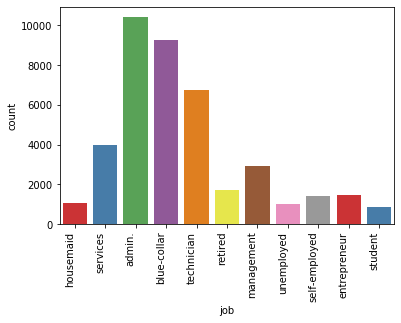

In [9]:
import matplotlib.pyplot
%matplotlib inline
count_plt = sns.countplot(x="job",data=bank, palette = "Set1")
count_plt.set_xticklabels(count_plt.get_xticklabels(), rotation=90, ha="right")
count_plt 
#plt.title('Count of app in each category',size = 20)

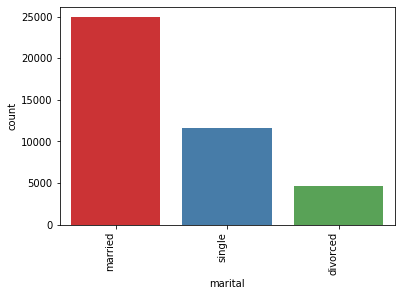

In [10]:
count_plt = sns.countplot(x="marital",data=bank, palette = "Set1")
count_plt.set_xticklabels(count_plt.get_xticklabels(), rotation=90, ha="right")
count_plt

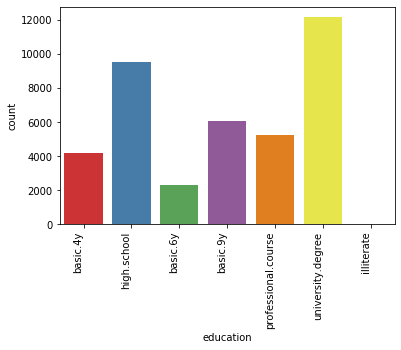

In [11]:
count_plt = sns.countplot(x="education",data=bank, palette = "Set1")
count_plt.set_xticklabels(count_plt.get_xticklabels(), rotation=90, ha="right")
count_plt

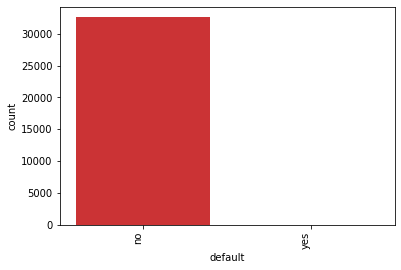

In [12]:
count_plt = sns.countplot(x="default",data=bank, palette = "Set1")
count_plt.set_xticklabels(count_plt.get_xticklabels(), rotation=90, ha="right")
count_plt

In [13]:
#drop default column
bank = bank.drop(['default'], axis = 1)
#As only three values are yes and the remaing values are No there would not be impactful in building the model.

In [14]:
bank.isnull().sum()

age                  0
job                330
marital             80
education         1731
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

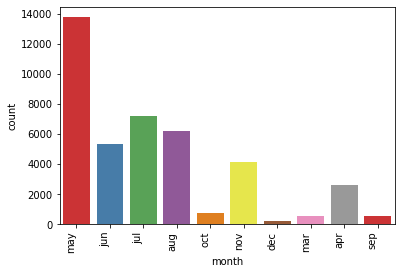

In [15]:
count_plt = sns.countplot(x="month",data=bank, palette = "Set1")
count_plt.set_xticklabels(count_plt.get_xticklabels(), rotation=90, ha="right")
count_plt

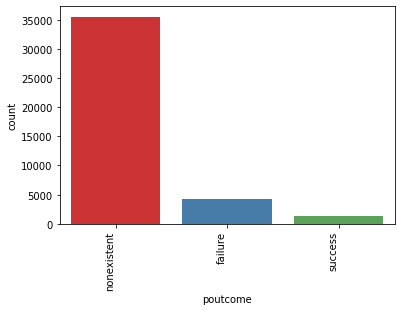

In [16]:
count_plt = sns.countplot(x="poutcome",data=bank, palette = "Set1")
count_plt.set_xticklabels(count_plt.get_xticklabels(), rotation=90, ha="right")
count_plt

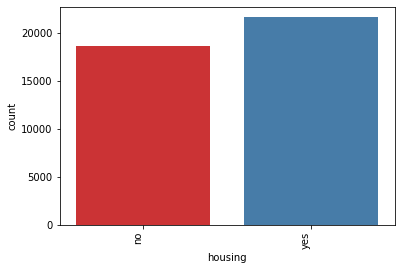

In [17]:
count_plt = sns.countplot(x="housing",data=bank, palette = "Set1")
count_plt.set_xticklabels(count_plt.get_xticklabels(), rotation=90, ha="right")
count_plt

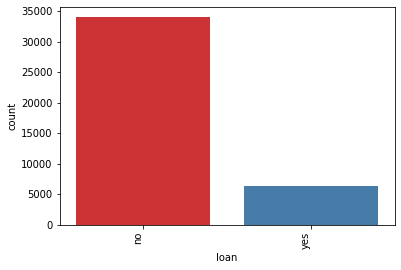

In [18]:
count_plt = sns.countplot(x="loan",data=bank, palette = "Set1")
count_plt.set_xticklabels(count_plt.get_xticklabels(), rotation=90, ha="right")
count_plt

In [19]:
cols = ['job','marital','education','housing','loan']
for i in cols:
    print(bank[i].unique())
    print(bank[i].nunique())
    print(' ')

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']
11
 
['married' 'single' 'divorced' nan]
3
 
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']
7
 
['no' 'yes' nan]
2
 
['no' 'yes' nan]
2
 


In [20]:
cols = ['job','marital','education','housing','loan']
for i in cols:
    print(i)
    print(bank[i].value_counts())
    print(' ')

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64
 
marital
married     24928
single      11568
divorced     4612
Name: marital, dtype: int64
 
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64
 
housing
yes    21576
no     18622
Name: housing, dtype: int64
 
loan
no     33950
yes     6248
Name: loan, dtype: int64
 


In [21]:
bank.isnull().sum()

age                  0
job                330
marital             80
education         1731
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

##### Replacing the missing values with Mode will induce bias into the model. THe mode of the respective 5 columns has very huge difference compared to the other values of the respective columns, so replacing them with mode is not appropriate. 
##### Missing values constitute about 8% of the total data. leaving us with 92 % clean data.

In [22]:
bank = bank.dropna()
bank

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [23]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000
mean,39.860871,258.207583,2.566662,963.531651,0.170009,0.082861,93.570313,-40.541164,3.623298,5167.432566
std,10.289488,259.792638,2.767473,184.295254,0.487169,1.565945,0.576367,4.623200,1.730226,71.760333
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [24]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
bank['job']      = labelencoder_x.fit_transform(bank['job']) 
bank['marital']  = labelencoder_x.fit_transform(bank['marital']) 
bank['education']= labelencoder_x.fit_transform(bank['education']) 
bank['housing']  = labelencoder_x.fit_transform(bank['housing']) 
bank['loan']     = labelencoder_x.fit_transform(bank['loan']) 
bank['contact']     = labelencoder_x.fit_transform(bank['contact']) 
bank['month']       = labelencoder_x.fit_transform(bank['month']) 
bank['day_of_week'] = labelencoder_x.fit_transform(bank['day_of_week']) 
bank['poutcome'] = labelencoder_x.fit_transform(bank['poutcome'])
bank['y'] = labelencoder_x.fit_transform(bank['y'])

In [25]:
# as the number of unique values are more for age we can group them togeather into categories
def age(df):
    df.loc[df['age'] <= 32, 'age'] = 1
    df.loc[(df['age'] > 32) & (df['age'] <= 47), 'age'] = 2
    df.loc[(df['age'] > 47) & (df['age'] <= 70), 'age'] = 3
    df.loc[(df['age'] > 70) & (df['age'] <= 98), 'age'] = 4
           
    return df

age(bank);

In [26]:
# as the number of unique values are more for duration of call we can group them togeather in to categories
def duration(dataset):

    dataset.loc[dataset['duration'] <= 102, 'duration'] = 1
    dataset.loc[(dataset['duration'] > 102) & (dataset['duration'] <= 180)  , 'duration']    = 2
    dataset.loc[(dataset['duration'] > 180) & (dataset['duration'] <= 319)  , 'duration']   = 3
    dataset.loc[(dataset['duration'] > 319) & (dataset['duration'] <= 644.5), 'duration'] = 4
    dataset.loc[dataset['duration']  > 644.5, 'duration'] = 5

    return dataset
duration(bank);

In [27]:
bank

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,1,6,1,3,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,3,7,1,3,0,0,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,2,7,1,3,1,0,1,6,1,3,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,2,0,1,1,0,0,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,3,7,1,3,0,1,1,6,1,3,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4,5,1,5,1,0,0,7,0,4,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,2,1,1,5,0,0,0,7,0,4,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,3,5,1,6,1,0,0,7,0,3,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,2,9,1,5,0,0,0,7,0,4,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


y
0    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
1    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
dtype: object

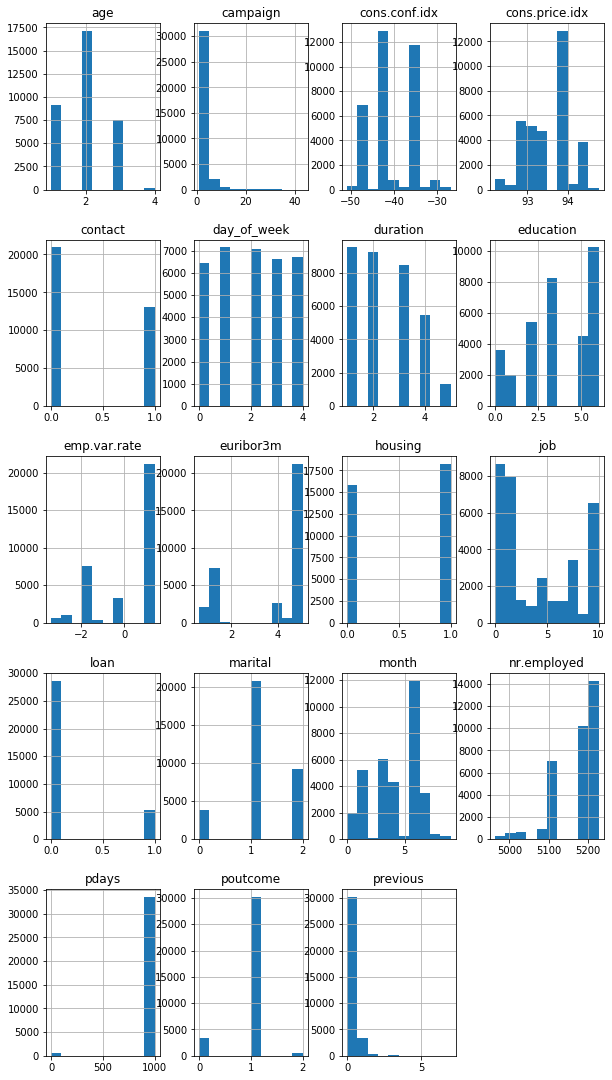

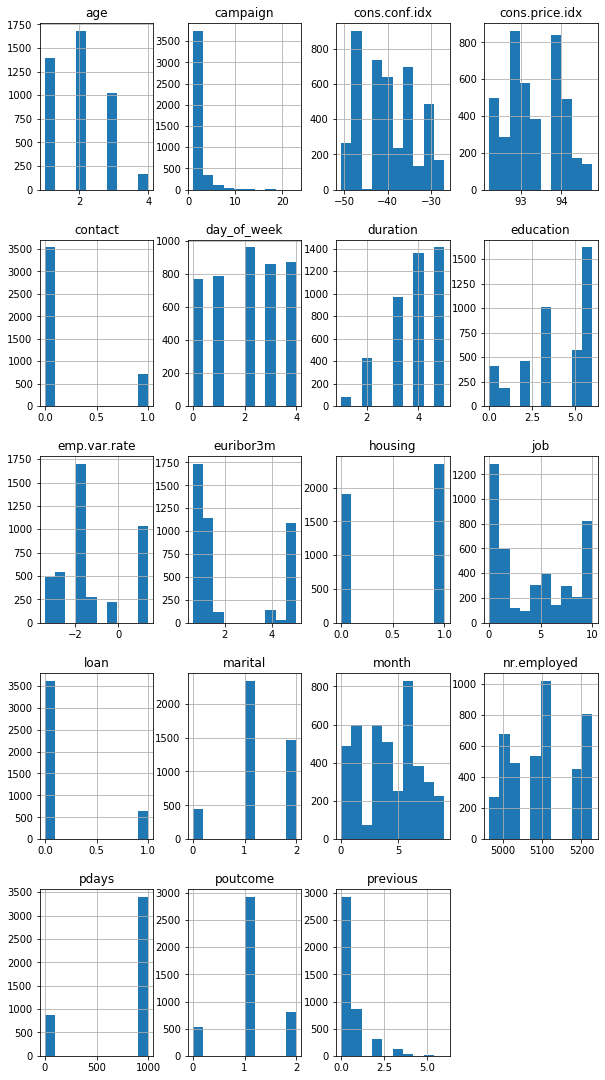

In [28]:
bank.groupby(bank['y']).hist(figsize=(10, 19))

# Model Build

In [29]:
y = bank['y']
bank_x = bank.drop(['y'], axis = 1)

In [30]:
#standardisation
sc = StandardScaler()
bank_sc = sc.fit_transform(bank_x)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(bank_sc, y, random_state = 0, test_size = 0.25)


# Classification tasks:

### KNN Classification:


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score  
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("KNN train score: ",knn.score(X_train, y_train))
print("KNN test score: ",knn.score(X_test, y_test))

KNN train score:  0.9229508768259945
KNN test score:  0.9027400125496758


In [33]:
grid_params = {'n_neighbors' : [3, 5, 11, 15], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 3, n_jobs = -1)

In [34]:
gs_fit = gs.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.5min finished


In [35]:
print("KNN train score: ",gs.score(X_train, y_train))
print("KNN test score: ",gs.score(X_test, y_test))
print("Best score : ", gs_fit.best_score_)
print("Best estimator: ",gs_fit.best_estimator_)
print("Best parameters: ",gs_fit.best_params_)

KNN train score:  0.9091447895966251
KNN test score:  0.9085965279230287
Best score :  0.9021720182686609
Best estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


In [36]:
#cross-validation
from sklearn.model_selection import cross_val_score, cross_val_predict,cross_validate
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')
knn.fit(X_train, y_train)
knn_scores = cross_validate(knn,X_test, y_test, cv=5)
print("KNN scores: ",knn_scores)
print("KNN train score: ", knn.score(X_train, y_train))
print("KNN test score: ", knn.score(X_test, y_test))

KNN scores:  {'fit_time': array([0.01797223, 0.01795173, 0.01695466, 0.01695633, 0.01595664]), 'score_time': array([0.30712724, 0.30917287, 0.30223513, 0.30517387, 0.30814552]), 'test_score': array([0.90538421, 0.90852065, 0.90376569, 0.91056485, 0.90376569])}
KNN train score:  0.9091447895966251
KNN test score:  0.9085965279230287


In [37]:
y_predict = knn.predict(X_test)
y_true = y_test

In [38]:
import sklearn
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_predict)

0.9085965279230287

### Logistic Regression 

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter= 400)
logreg.fit(X_train, y_train)
print("Logistic Regression train score: ",logreg.score(X_train, y_train))
print("Logistic Regression test score: ",logreg.score(X_test, y_test))

Logistic Regression train score:  0.9070180943415961
Logistic Regression test score:  0.9127797531897093


C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
grid_values = {'penalty': ['l1','l2'], 'C': [0.1,1,10,100,1000]} 

logreg_gs_fit = GridSearchCV(logreg, grid_values, cv = 3, verbose = 1, n_jobs = -1)

In [41]:
gscv_fit = logreg_gs_fit.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.0s finished
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
print("Logistic Regression train score: ",logreg_gs_fit.score(X_train, y_train))
print("Logistic Regression test score: ",logreg_gs_fit.score(X_test, y_test))
print("Best score : ", gscv_fit.best_score_)
print("Best estimator: ",gscv_fit.best_estimator_)
print("Best parameters: ",gscv_fit.best_params_)

Logistic Regression train score:  0.907401596764634
Logistic Regression test score:  0.9129889144530433
Best score :  0.9075410521911934
Best estimator:  LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Best parameters:  {'C': 0.1, 'penalty': 'l1'}


In [43]:
#cross-validation
logreg = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)
logreg_scores = cross_validate(logreg,X_test, y_test, cv=5)
print("Logistic Regression scores: ",logreg_scores)
print("Logistic Regression train score: ", logreg.score(X_train, y_train))
print("Logistic Regression test score: ", logreg.score(X_test, y_test))



C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression scores:  {'fit_time': array([0.07875681, 0.05285811, 0.07180786, 0.08976102, 0.04787183]), 'score_time': array([0.00099754, 0.0009973 , 0.00099754, 0.        , 0.00104499]), 'test_score': array([0.91636174, 0.91740721, 0.91213389, 0.91788703, 0.9084728 ])}
Logistic Regression train score:  0.9074364606212739
Logistic Regression test score:  0.9129889144530433


C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
y_predict = logreg.predict(X_test)
y_true = y_test
import sklearn
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_predict)

0.9129889144530433

### Linear Support Vector Machine

In [45]:
from sklearn.svm import LinearSVC
lsvm = LinearSVC()
lsvm.fit(X_train, y_train)
print("Linear Support Vector Machine train score: ",lsvm.score(X_train, y_train))
print("Linear Support Vector Machine  test score: ",lsvm.score(X_test, y_test))

Linear Support Vector Machine train score:  0.9057978593592023
Linear Support Vector Machine  test score:  0.9116293662413721


C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [46]:
param_values = {'C': [0.1,1,10,100,1000]} 

lsvm_gs = GridSearchCV(lsvm, param_values, cv = 5, n_jobs = -1)

In [47]:
lsvm_gs_fit = lsvm_gs.fit(X_train, y_train)

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [48]:
print("Linear Support Vector Machine train score: ",lsvm_gs.score(X_train, y_train))
print("Linear Support Vector Machine test score: ",lsvm_gs.score(X_test, y_test))
print("Best score : ", lsvm_gs_fit.best_score_)
print("Best estimator: ",lsvm_gs_fit.best_estimator_)
print("Best parameters: ",lsvm_gs_fit.best_params_)

Linear Support Vector Machine train score:  0.9059024509291218
Linear Support Vector Machine test score:  0.9116293662413721
Best score :  0.905484084649444
Best estimator:  LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Best parameters:  {'C': 1}


In [49]:
#cross-validation
lsvm = LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
lsvm.fit(X_train, y_train)
lsvm_scores = cross_validate(lsvm,X_test, y_test, cv=5)
print("Linear Support Vector Machine scores: ",lsvm_scores)
print("Linear Support Vector Machine train score: ", lsvm.score(X_train, y_train))
print("Linear Support Vector Machine test score: ", lsvm.score(X_test, y_test))

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

Linear Support Vector Machine scores:  {'fit_time': array([0.31417203, 0.34811616, 0.36701822, 0.37304473, 0.35908532]), 'score_time': array([0.00095391, 0.00095153, 0.0009985 , 0.00095534, 0.00095129]), 'test_score': array([0.91897543, 0.9132253 , 0.9084728 , 0.91631799, 0.90533473])}
Linear Support Vector Machine train score:  0.9058327232158422
Linear Support Vector Machine test score:  0.9116293662413721


C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [50]:
y_predict = lsvm.predict(X_test)
y_true = y_test
import sklearn
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_predict)

0.9116293662413721

### Kerenilzed Support Vector Machine (rbf, poly, and linear)

In [51]:
from sklearn.svm import SVC
svc_obj = SVC()

In [52]:
param_values = {'kernel': ['rbf','linear','poly'], 'C' : [0.1, 1]}
               
kernelized_svm = GridSearchCV(svc_obj, param_values, verbose = 2, cv = 3, n_jobs = -1)
kernelized_svmfit = kernelized_svm.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:   29.2s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   42.8s finished
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [53]:
print("kernelized_svm train score: ",kernelized_svm.score(X_train, y_train))
print("kernelized_svm test score: ",kernelized_svm.score(X_test, y_test))
print("Best score : ", kernelized_svmfit.best_score_)
print("Best estimator: ",kernelized_svmfit.best_estimator_)
print("Best parameters: ",kernelized_svmfit.best_params_)

kernelized_svm train score:  0.9146881428023568
kernelized_svm test score:  0.910897301819703
Best score :  0.9043684412369697
Best estimator:  SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Best parameters:  {'C': 1, 'kernel': 'rbf'}


In [54]:
#cross-validation
svc_obj = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
svc_obj.fit(X_train, y_train)
svc_obj_scores = cross_validate(svc_obj,X_test, y_test, cv=5)
print("kernelized_svm scores: ",svc_obj_scores)
print("kernelized_svm train score: ", svc_obj.score(X_train, y_train))
print("kernelized_svm test score: ", svc_obj.score(X_test, y_test))



C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

kernelized_svm scores:  {'fit_time': array([0.56948137, 0.55049467, 0.56649208, 0.58739877, 0.64427662]), 'score_time': array([0.08477378, 0.08381128, 0.08679175, 0.09678531, 0.09773874]), 'test_score': array([0.91270256, 0.90747517, 0.90376569, 0.90951883, 0.90376569])}
kernelized_svm train score:  0.9146881428023568
kernelized_svm test score:  0.910897301819703


In [55]:
y_predict = svc_obj.predict(X_test)
y_true = y_test
import sklearn
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_predict)

0.910897301819703

### Decision Tree

In [240]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print("Decision tree train score: ",dtree.score(X_train, y_train))
print("Decision tree test score: ",dtree.score(X_test, y_test))

Decision tree train score:  0.9978035770316912
Decision tree test score:  0.8895628529596319


In [241]:
parameters = {'criterion':['gini','entropy'], 'max_depth': range(2,20)}
dtree_gs = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs = -1, cv = 2)

In [242]:
dtree_gs_fit = dtree_gs.fit(X_train, y_train)

In [243]:
print("Decision tree train score: ",dtree_gs.score(X_train, y_train))
print("Decision tree test score: ",dtree_gs.score(X_test, y_test))
print("Best score : ", dtree_gs_fit.best_score_)
print("Best estimator: ",dtree_gs_fit.best_estimator_)
print("Best parameters: ",dtree_gs_fit.best_params_)

Decision tree train score:  0.9106787992887774
Decision tree test score:  0.911106463083037
Best score :  0.9091447895966251
Best estimator:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Best parameters:  {'criterion': 'gini', 'max_depth': 4}


In [244]:
#cross-validation
dtree = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
dtree.fit(X_train, y_train)
dtree_scores = cross_validate(dtree,X_test, y_test, cv=5)
print("Decision tree scores: ",dtree_scores)
print("Decision tree train score: ", dtree.score(X_train, y_train))
print("Decision tree test score: ", dtree.score(X_test, y_test))


y_scores =dtree.predict_proba(X_test)
fpr_dt_clf, tpr_dt_clf, threshold_dt_clf = roc_curve(y_test, y_scores[:,1])
roc_auc_dt_clf = auc(fpr_dt_clf, tpr_dt_clf)

Decision tree scores:  {'fit_time': array([0.01195788, 0.01201558, 0.00798273, 0.00798774, 0.00799108]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_score': array([0.91845269, 0.91897543, 0.91527197, 0.91474895, 0.91579498])}
Decision tree train score:  0.9106787992887774
Decision tree test score:  0.911106463083037


In [245]:
y_predict = dtree.predict(X_test)
y_true = y_test
import sklearn
from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(y_true, y_predict)
dt_accuracy 

0.911106463083037

# Random Forest

In [232]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score
import sklearn.model_selection
#sklearn.model_selection.KFold

In [233]:
kFold = StratifiedKFold(n_splits=5)

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',n_jobs= -1,random_state=10)

param_grid = {'max_features': [5,10,15,19],
          'max_depth': [5, 10,14],
           'max_leaf_nodes':[20,25,30,50]}

grid_search = GridSearchCV(rf_clf, param_grid, scoring = 'accuracy',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=-1,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=Fals

In [234]:
grid_search.best_params_

{'max_depth': 14, 'max_features': 15, 'max_leaf_nodes': 50}

In [235]:
grid_search.best_score_

0.9121779451242896

In [236]:
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',max_features=15,max_depth=14,max_leaf_nodes=50)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features=15, max_leaf_nodes=50,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [237]:
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

rf_train_score = accuracy_score(y_train, y_pred_train)
rf_test_score = accuracy_score(y_test, y_pred_test)

print('Train score: {}'
      .format(rf_train_score))
print('Test score: {}'
      .format(rf_test_score))

metrics.confusion_matrix(y_test, y_pred_test)


y_scores =rf_clf.predict_proba(X_test)
fpr_rf_clf, tpr_rf_clf, threshold_rf_clf = roc_curve(y_test, y_scores[:,1])
roc_auc_rf_clf = auc(fpr_rf_clf, tpr_rf_clf)

Train score: 0.9214168671338423
Test score: 0.9153942689813847


# Hard voting

In [86]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

hard_voting_clf = VotingClassifier(estimators=[('knn', knn),('lr',logreg),('lsvc', lsvm),
                                   ('ksvc', svc_obj),('dt', dtree), ('rt', rf_clf)],voting = 'hard')
hard_voting_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(hard_voting_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(hard_voting_clf.score(X_test, y_test)))

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train score: 0.91
Test score: 0.91


In [87]:
hard_score = cross_val_score(estimator=hard_voting_clf,X=X_train,y=y_train, scoring='accuracy', cv=kFold)

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: Convergen

In [88]:
print('Mean Score: {0:0.2f}'.format(hard_score.mean()))
print('Mean Std: {0:0.2f}'.format(hard_score.std()))

Mean Score: 0.91
Mean Std: 0.00


# Soft voting

In [89]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

soft_voting_clf = VotingClassifier(estimators=[('knn', knn),('lr',logreg),
                                   ('dt', dtree), ('rt', rf_clf)],voting = 'soft')
soft_voting_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(soft_voting_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(soft_voting_clf.score(X_test, y_test)))

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train score: 0.91
Test score: 0.91


In [90]:
soft_score = cross_val_score(estimator=soft_voting_clf,X=X_train,y=y_train, scoring='recall_weighted', cv=kFold)

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [91]:
print('Mean Score: {0:0.2f}'.format(soft_score.mean()))
print('Mean Std: {0:0.2f}'.format(soft_score.std()))

Mean Score: 0.91
Mean Std: 0.00


train_scores= [knn_train_p_score, lreg_train_p_score, rf_train_score, knn_pca_train_p_score,
                      logreg_pca_train_p_score, lscvc_train_score, kscv_train_p_score, 
                      dt_train_p_score, rf_train_p_score]

test_scores= [knn_valid_score, lreg_valid_score,rf_valid_p_score, knn_valid_p_score,
                     logreg_valid_p_score, lscv_valid_p_score, kscv_valid_p_score, 
                     dt_valid_p_score, rf_valid_p_score]

classifiers = ['KNN Clasification', 'Logistic Regression','Random Forest', 'Linear SVM with PCA',
               'Kernalised SVM with PCA', 'Decision Trees with PCA', 'Random Forest with PCA']

## scores
##### KNN
1. KNN train score:  0.9091447895966251
2. KNN test score:  0.9085965279230287
3. Accuracy:0.9085965279230287

##### Logistic
1. Logistic Regression train score:  0.9074364606212739
2. Logistic Regression test score:  0.9129889144530433
3. Accuracy:0.9129889144530433

##### Linear SVM 
1. Linear Support Vector Machine train score:  0.9057978593592023
2. Linear Support Vector Machine test score:  0.9116293662413721
3. Accuracy:0.9116293662413721

##### kernelized_svm 
1. kernelized_svm train score:  0.9146881428023568
2. kernelized_svm test score:  0.910897301819703
3. Accuracy:0.910897301819703

##### Decision tree
1. Decision tree train score:  0.9106787992887774
2. Decision tree test score:  0.911106463083037
3. Accuracy:0.911106463083037

##### Random forest
1. Random forest Train score: 0.92187009727016
2. Random forest Test score: 0.9166492365613889


From these Stats we can see that the Random forest and Logistic model are a better model compared to the other models.

so we perform the the following operations on the Random forest and Logistic Regression models:

1. bagging - random forest and logistic regression

2. pasting - Kernelized_svm and decision tree

3. adaboosting - 

4. gradient boosting - 



# Bagging

# Logistic Regression model Bagging

In [92]:
from sklearn.ensemble import BaggingClassifier

bag_log = BaggingClassifier(base_estimator=logreg, n_estimators=100,bootstrap_features=True, max_samples=50, max_features=19)

log_bag_score = cross_val_score(estimator=bag_log, X=X_train, y=y_train, scoring='accuracy', cv=kFold, n_jobs=-1)
print('Mean score:', log_bag_score.mean())

Mean score: 0.8873548855133144


In [93]:
bag_log.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_log.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_log.score(X_test, y_test)))

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Train score: 0.89
Test score: 0.89


# Random forest model Bagging

In [94]:
bag_rf = BaggingClassifier(base_estimator=rf_clf, n_estimators=500,bootstrap_features=True, max_samples=50, max_features=19)

bag_rf_score = cross_val_score(estimator=bag_rf, X=X_train, y=y_train, scoring='accuracy', cv=kFold, n_jobs=-1)
print('Mean score:', bag_rf_score.mean())

Mean score: 0.8921662667531495


In [95]:
bag_rf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_rf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_rf.score(X_test, y_test)))

Train score: 0.89
Test score: 0.90


# Pasting

## Kernelized_svm model pasting

In [96]:
bag_ksvc = BaggingClassifier(base_estimator=svc_obj, n_estimators=100,bootstrap_features=False, max_samples=50, max_features=19)

bag_ksvc_score = cross_val_score(estimator=bag_ksvc, X=X_train, y=y_train, scoring='accuracy', cv=kFold, n_jobs=-1)
print('Mean score:', bag_ksvc_score.mean())

Mean score: 0.8873548855133144


In [97]:
bag_ksvc.fit(X_train, y_train)
print('kernelized_svm train score: {:.2f}'.format(bag_ksvc.score(X_train, y_train)))
print('kernelized_svm test score: {:.2f}'.format(bag_ksvc.score(X_test, y_test)))

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

kernelized_svm train score: 0.89
kernelized_svm test score: 0.89


##  Decision Tree pasting

In [98]:
bag_dt = BaggingClassifier(base_estimator=dtree, n_estimators=100,bootstrap_features=False, max_samples=50, max_features=19)

bag_dt_score = cross_val_score(estimator=bag_dt, X=X_train, y=y_train, scoring='accuracy', cv=kFold, n_jobs=-1)
print('Mean score:', bag_dt_score.mean())

Mean score: 0.9007081913320938


In [99]:
bag_dt.fit(X_train, y_train)
print('Decision Tree train score: {:.2f}'.format(bag_dt.score(X_train, y_train)))
print('Decision Tree test score: {:.2f}'.format(bag_dt.score(X_test, y_test)))

Decision Tree train score: 0.90
Decision Tree test score: 0.91


# Adaboosting 
- performd on the best two models from bagging 

# Logistic Regression with adaboosting

In [148]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_log_clf = AdaBoostClassifier(base_estimator = logreg, learning_rate = 0.5)
adaboost_log_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(adaboost_log_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_log_clf.score(X_test, y_test)))

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Train score: 0.89
Test score: 0.89


C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Random forest with adabossting

In [224]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_rf_clf = AdaBoostClassifier(base_estimator = rf_clf, learning_rate = 0.5)
adaboost_rf_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(adaboost_rf_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_rf_clf.score(X_test, y_test)))

y_scores =adaboost_rf_clf.predict_proba(X_test)
fpr_rf_ada, tpr_rf_ada, threshold_rf_ada = roc_curve(y_test, y_scores[:,1])
roc_auc_rf_ada = auc(fpr_rf_ada, tpr_rf_ada)

Train score: 0.97
Test score: 0.91


# Gradient boosting 

In [163]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf1 = GradientBoostingClassifier(learning_rate = 0.05)
gb_clf1.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(gb_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(gb_clf.score(X_test, y_test)))

Train score: 0.92
Test score: 0.92


In [164]:
gb_clf2 = GradientBoostingClassifier(learning_rate = 1)
gb_clf2.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(gb_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(gb_clf.score(X_test, y_test)))

Train score: 0.92
Test score: 0.92


In [165]:
GB = GradientBoostingClassifier()
score = cross_val_score(estimator=GB, X=X_train, y=y_train, cv=kFold, n_jobs=-1)
gb_clf1.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(gb_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(gb_clf.score(X_test, y_test)))
print('Mean Accuracy:', score.mean())

Train score: 0.92
Test score: 0.92
Mean Accuracy: 0.9133286293533628


In [228]:
GB2 = GradientBoostingClassifier(min_samples_leaf=9, learning_rate=.05, n_estimators=100)
score = cross_val_score(estimator=GB, X=X_train, y=y_train, cv=kFold, n_jobs=-1)
gb_clf2.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(gb_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(gb_clf.score(X_test, y_test)))
print('Mean Accuracy:', score.mean())

y_scores =gb_clf2.predict_proba(X_test)
fpr_grad, tpr_grad, threshold_grad = roc_curve(y_test, y_scores[:,1])
roc_auc_grad = auc(fpr_grad, tpr_grad)

Train score: 0.92
Test score: 0.92
Mean Accuracy: 0.9133286293533628


# Applying PCA to all the models

In [169]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

In [170]:
pca = PCA(n_components=15, svd_solver='auto')

X_train_pca = pca.fit_transform(X_train) #training
X_test_pca = pca.transform(X_test) #test

In [171]:
X_train_pca.shape

(28683, 15)

In [172]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.22216831, 0.31202745, 0.39030544, 0.46127615, 0.5203336 ,
       0.57847852, 0.6328608 , 0.68574759, 0.73748218, 0.78727607,
       0.83489292, 0.87951982, 0.92030201, 0.95185865, 0.98153465])

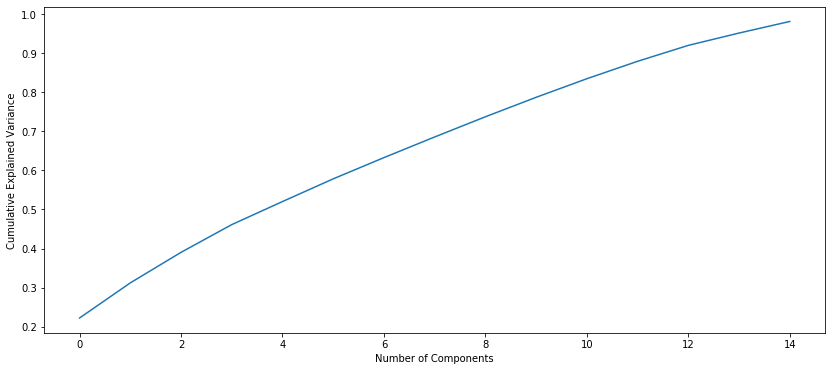

In [173]:
plt.figure(figsize=(14,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

# KNN Classification with PCA

In [174]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf_pca = KNeighborsClassifier(n_jobs=-1)

param_grid={'n_neighbors':[1,2,3,4,5,7,10]}

grid_search = GridSearchCV(knn_clf_pca, param_grid, scoring = 'accuracy',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [115]:
grid_search.cv_results_

{'mean_fit_time': array([0.04952784, 0.04159846, 0.0487299 , 0.0551178 , 0.05205617,
        0.05548372, 0.05175381, 0.05692902]),
 'std_fit_time': array([0.00407713, 0.00235789, 0.0036829 , 0.00615875, 0.0038872 ,
        0.00487976, 0.00314673, 0.00640227]),
 'mean_score_time': array([0.00079885, 0.        , 0.00153327, 0.00159788, 0.00079885,
        0.        , 0.00160298, 0.00079041]),
 'std_score_time': array([0.00159769, 0.        , 0.00188066, 0.001957  , 0.00159769,
        0.        , 0.00196326, 0.00158081]),
 'param_C': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.0001},
  {'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.88724294, 0.89525967, 0.90083653, 0.90223074, 0.90188219,
        0.90188219, 0.90188219, 0.90188219]),
 'spl

In [175]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 10}
0.9003242338667503


In [176]:
knn_clf_pca=KNeighborsClassifier(n_neighbors=10)
knn_clf_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [177]:
y_pred_train = knn_clf_pca.predict(X_train_pca)
y_pred_test = knn_clf_pca.predict(X_test_pca)

knn_pca_train_score = accuracy_score(y_train, y_pred_train)
knn_pca_test_score = accuracy_score(y_test, y_pred_test)
print('Train score: {}'
      .format(knn_pca_train_score))
print('Test score: {}'
      .format(knn_pca_test_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train score: 0.9100163860126207
Test score: 0.9080736247646936


array([[8424,  111],
       [ 768,  259]], dtype=int64)

# Logisitc Regression Classification with PCA

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score

lreg_clf_pca = LogisticRegression(multi_class='multinomial', solver='lbfgs')

param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(lreg_clf_pca, param_grid, scoring = 'accuracy',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [179]:
grid_search.cv_results_

{'mean_fit_time': array([0.04627738, 0.03789878, 0.04129024, 0.05585299, 0.06263304,
        0.05505314, 0.05924397, 0.05605054]),
 'std_fit_time': array([0.00698303, 0.00282101, 0.00223898, 0.00945884, 0.00868045,
        0.0046949 , 0.00448913, 0.00159645]),
 'mean_score_time': array([0.00059857, 0.00079827, 0.000599  , 0.00079618, 0.00059905,
        0.00099759, 0.00079532, 0.00039897]),
 'std_score_time': array([4.88733375e-04, 3.99136696e-04, 4.89084009e-04, 3.98107417e-04,
        4.89124942e-04, 4.62310777e-07, 3.97691607e-04, 4.88636039e-04]),
 'param_C': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.0001},
  {'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.88724294, 0.89525967, 0.90240502, 0.9032764 , 0.90310213,
        0.90310213,

In [180]:
grid_search.best_params_

{'C': 0.1}

In [181]:
lreg_clf_pca = LogisticRegression(multi_class='multinomial', solver='lbfgs',C=0.1)
lreg_clf_pca.fit(X_train_pca, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
y_pred_train = lreg_clf_pca.predict(X_train_pca)
y_pred_test = lreg_clf_pca.predict(X_test_pca)

logreg_pca_train_score = accuracy_score(y_train, y_pred_train)
logreg_pca_test_score = accuracy_score(y_test, y_pred_test)

print('Train score: {}'
      .format(logreg_pca_train_score))
print('Test score: {}'
      .format(logreg_pca_test_score))

metrics.confusion_matrix(y_test, y_pred_test)


Train score: 0.9064951364919988
Test score: 0.9150805270863837


array([[8371,  164],
       [ 648,  379]], dtype=int64)

# Linear SVM with PCA

In [183]:
from sklearn.svm import LinearSVC

LSVC_clf_pca = LinearSVC(multi_class='crammer_singer')

param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(LSVC_clf_pca, param_grid, scoring = 'accuracy',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='crammer_singer', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [184]:
grid_search.cv_results_

{'mean_fit_time': array([4.28923130e-02, 1.86308813e-01, 1.56182909e-01, 1.17290449e-01,
        3.59850693e-01, 1.83911047e+00, 1.04172618e+01, 1.19117671e+02]),
 'std_fit_time': array([7.70738028e-03, 1.92279144e-02, 1.97018219e-02, 2.65864506e-02,
        4.38347840e-02, 1.01919771e-01, 8.13497329e-01, 5.75307389e+01]),
 'mean_score_time': array([0.0009975 , 0.00079112, 0.00079818, 0.00099115, 0.00119448,
        0.00138192, 0.00089245, 0.00157709]),
 'std_score_time': array([3.50402318e-07, 3.95778616e-04, 3.99088956e-04, 1.24237815e-05,
        3.84057980e-04, 4.85256009e-04, 1.44661848e-04, 8.11814336e-04]),
 'param_C': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.0001},
  {'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.83687696, 0.8

In [185]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1}
0.8970121674859673


In [186]:
LSVC_clf_pca = LinearSVC(multi_class='crammer_singer', C=1)
LSVC_clf_pca.fit(X_train_pca, y_train)

C:\Users\srira\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='crammer_singer', penalty='l2', random_state=None,
          tol=0.0001, verbose=0)

In [187]:
y_pred_train = LSVC_clf_pca.predict(X_train_pca)
y_pred_test = LSVC_clf_pca.predict(X_test_pca)

LSVC_clf_pca_train_score = accuracy_score(y_train, y_pred_train)
LSVC_clf_pca_test_score = accuracy_score(y_test, y_pred_test)

print('Train score: {}'
      .format(LSVC_clf_pca_train_score))
print('Test score: {}'
      .format(LSVC_clf_pca_test_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train score: 0.8970121674859673
Test score: 0.9021125287596737


array([[8417,  118],
       [ 818,  209]], dtype=int64)

# Kernalised SVM with PCA

In [262]:
from sklearn import svm

KSVC_clf_pca = svm.SVC(kernel='rbf')

param_grid = {'C': [0.01,0.1,1],
          'gamma': [0.01,0.1]}

grid_search = GridSearchCV(KSVC_clf_pca, param_grid, scoring = 'accuracy',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1], 'gamma': [0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [263]:
grid_search.cv_results_

{'mean_fit_time': array([3.52497101, 3.77350979, 3.44038658, 4.03120971, 3.75474968,
        4.07946825]),
 'std_fit_time': array([0.09475404, 0.02335474, 0.07952559, 0.08463396, 0.0598479 ,
        0.07240319]),
 'mean_score_time': array([0.56170454, 0.61098094, 0.53778439, 0.62654729, 0.53039751,
        0.58285995]),
 'std_score_time': array([0.00622743, 0.0029208 , 0.00582126, 0.01721064, 0.0031065 ,
        0.00572922]),
 'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 1, 1],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.01, 0.1, 0.01, 0.1, 0.01, 0.1],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01, 'gamma': 0.01},
  {'C': 0.01, 'gamma': 0.1},
  {'C': 0.1, 'gamma': 0.01},
  {'C': 0.1, 'gamma': 0.1},
  {'C': 1, 'gamma': 0.01},
  {'C': 1, 'gamma': 0.1}],
 'split0_test_score': array([0.

In [264]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'gamma': 0.1}
0.904682215946728


In [265]:
from sklearn import svm
KSVC_clf_pca = svm.SVC(kernel='rbf',C=1,gamma=0.1)
KSVC_clf_pca.fit(X_train_pca, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [266]:
y_pred_train = KSVC_clf_pca.predict(X_train_pca)
y_pred_test = KSVC_clf_pca.predict(X_test_pca)

KSVC_clf_pca_train_score = accuracy_score(y_train, y_pred_train)
KSVC_clf_pca_test_score = accuracy_score(y_test, y_pred_test)

print('Train score: {}'
      .format(KSVC_clf_pca_train_score))
print('Test score: {}'
      .format(KSVC_clf_pca_test_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train score: 0.9253564829341422
Test score: 0.911315624346371


array([[8346,  189],
       [ 659,  368]], dtype=int64)

# Decision Trees with PCA

In [248]:
from sklearn.tree import DecisionTreeClassifier

dt_clf_pca = DecisionTreeClassifier()
param_grid = {'max_depth': [2, 3, 4, 5,6, 10, 20]}

grid_search = GridSearchCV(dt_clf_pca, param_grid, scoring = 'accuracy',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 10, 20]},

In [249]:
grid_search.cv_results_

{'mean_fit_time': array([0.06918187, 0.09578013, 0.12604938, 0.14923244, 0.17896085,
        0.28253489, 0.38576646]),
 'std_fit_time': array([0.00775788, 0.00223727, 0.00802621, 0.00191192, 0.00853083,
        0.00618708, 0.01965681]),
 'mean_score_time': array([0.0031929 , 0.00160913, 0.00078616, 0.00159111, 0.00159793,
        0.00079899, 0.0023767 ]),
 'std_score_time': array([0.00159664, 0.00197114, 0.00157232, 0.00194874, 0.00195706,
        0.00159798, 0.0019407 ]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 10, 20],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 10},
  {'max_depth': 20}],
 'split0_test_score': array([0.89735099, 0.89996514, 0.89996514, 0.89944231, 0.89769955,
        0.89212269, 0.86842105]),
 'split1_test_score': array([0.89419557, 0.89611295, 0.895764

In [250]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 6}
0.9003242338667503


In [251]:
dt_clf_pca = DecisionTreeClassifier(max_depth=6)
dt_clf_pca.fit(X_train_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [252]:
y_pred_train = dt_clf_pca.predict(X_train_pca)
y_pred_test = dt_clf_pca.predict(X_test_pca)

dt_clf_pca_train_score = accuracy_score(y_train, y_pred_train)
dt_clf_pca_test_score = accuracy_score(y_test, y_pred_test)

print('Train score: {}'
      .format(dt_clf_pca_train_score))
print('Test score: {}'
      .format(dt_clf_pca_test_score))

metrics.confusion_matrix(y_test, y_pred_test)

y_scores = dt_clf_pca.predict_proba(X_test_pca)
fpr_dt_pca, tpr_dt_pca, threshold_dt_pca = roc_curve(y_test, y_scores[:,1])
roc_auc_dt_pca = auc(fpr_dt_pca, tpr_dt_pca)

Train score: 0.909563155876303
Test score: 0.9035766576030119


# Random Forest with PCA

In [253]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [255]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_pca = RandomForestClassifier(n_estimators=300, criterion='gini',n_jobs= -1,random_state=10)

param_grid = {'max_features': [5,10,15],
          'max_depth': [6,8,10,12,14],
           'max_leaf_nodes':[20,22,30,50]}

grid_search = GridSearchCV(rf_clf_pca, param_grid, scoring = 'accuracy',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=-1,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=Fals

In [256]:
grid_search.cv_results_

{'mean_fit_time': array([ 2.75580339,  2.46614819,  2.65014906,  2.93179493,  5.07318559,
         5.13800745,  5.49685354,  5.9435926 ,  8.21705503,  8.61624308,
         9.79580531, 10.7797451 ,  3.68133054,  3.70489392,  3.94176526,
         4.21479249,  6.58657398,  6.64714909,  7.02573848,  7.48703036,
         9.45621743,  9.70359588, 10.31396203, 11.20254931,  3.65192013,
         3.69133115,  3.93788638,  4.26223369,  6.49627972,  7.31261487,
         7.00372987,  7.51746173,  9.53432121,  9.76874833, 10.44025679,
        11.44160409,  3.70245028,  3.74865031,  3.33359814,  3.22655406,
         5.03626566,  5.20197048,  5.67392335,  6.15955787,  7.99586983,
         8.47692757,  9.74772282, 11.10851789,  3.61734977,  3.78639021,
         3.91000776,  4.28162107,  6.45916042,  6.5637291 ,  6.93578525,
         7.49428573,  9.48685126,  9.7752562 ,  7.74069695,  8.6944119 ]),
 'std_fit_time': array([0.70717465, 0.03232135, 0.07861671, 0.01429641, 0.09896336,
        0.03642007, 0

In [257]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 10, 'max_features': 15, 'max_leaf_nodes': 50}
0.9049959906564864


In [259]:
rf_clf_pca = RandomForestClassifier(n_estimators=300, criterion='gini',max_features=15,max_depth=12,max_leaf_nodes=50)
rf_clf_pca.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features=15, max_leaf_nodes=50,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [260]:
y_pred_train = rf_clf_pca.predict(X_train_pca)
y_pred_test = rf_clf_pca.predict(X_test_pca)

rf_clf_pca_train_score = accuracy_score(y_train, y_pred_train)
rf_clf_pca_test_score = accuracy_score(y_test, y_pred_test)

print('Train score: {}'
      .format(rf_clf_pca_train_score))
print('Test score: {}'
      .format(rf_clf_pca_test_score))

metrics.confusion_matrix(y_test, y_pred_test)

y_scores = rf_clf_pca.predict_proba(X_test_pca)


Train score: 0.9149321897988355
Test score: 0.9117339468730391


## Comparing Normal models and PCA Models 

In [275]:
train_scores= [knn.score(X_train, y_train), logreg.score(X_train, y_train), lsvm.score(X_train, y_train), svc_obj.score(X_train, y_train), 
                      dtree.score(X_train, y_train), rf_train_score, knn_pca_train_score,
                      logreg_pca_train_score, LSVC_clf_pca_train_score, KSVC_clf_pca_train_score, 
                      dt_clf_pca_train_score, rf_clf_pca_train_score] 

test_scores= [knn.score(X_test, y_test),logreg.score(X_test, y_test), lsvm.score(X_train, y_train), svc_obj.score(X_test, y_test),
                     dtree.score(X_train, y_train), rf_test_score, knn_pca_train_score,
                     logreg_pca_test_score, LSVC_clf_pca_test_score,KSVC_clf_pca_test_score, 
                     dt_clf_pca_test_score, rf_clf_pca_test_score]

classifiers = ['KNN Clasification', 'Logistic Regression', 'Linear SVM', 'Kernelized SVM', 'Decision Tree',
               'Random Forest', 'KNN Classification with PCA', 'Logistic Regression with PCA', 'Linear SVM with PCA',
               'Kernalised SVM with PCA', 'Decision Trees with PCA', 'Random Forest with PCA']

In [276]:
tab = pd.DataFrame ([train_scores, test_scores], columns=classifiers, index=['Train Score', 'Test Score'])
tab =tab.T

In [277]:
tab

,Train Score,Test Score
KNN Clasification,0.909145,0.908597
Logistic Regression,0.907436,0.912989
Linear SVM,0.905833,0.905833
Kernelized SVM,0.914688,0.910897
Decision Tree,0.910679,0.910679
Random Forest,0.921417,0.915394
KNN Classification with PCA,0.910016,0.910016
Logistic Regression with PCA,0.906495,0.915081
Linear SVM with PCA,0.897012,0.902113
Kernalised SVM with PCA,0.925356,0.911316


From the below table, we could observe that almost every algorithm is performing similarly. 
This can be due to the reason that data may be clearly separated or can be classified using simple rules.
For example, decision tree with depth of 4 is giving accuracy of 91% with both train and validation. 

So for this problem, we look at other metrics such as AUC/ROC for model comparision.

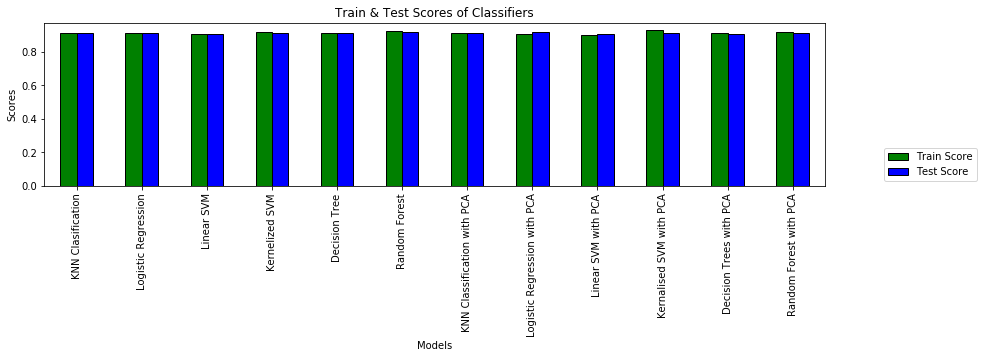

In [278]:

tab.plot(kind='bar', figsize=(14,3), color='gbmykc',  edgecolor='k')

plt.title('Train & Test Scores of Classifiers')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend(loc=4 , bbox_to_anchor=(1.2, 0))
plt.show();

# Deep learning

In [190]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [191]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import numpy
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# fix random seed for reproducibility
numpy.random.seed(10)

In [211]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [282]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [283]:
#compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [286]:
model.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
28683/28683 [==============================] - 2s 70us/step - loss: 0.1929 - accuracy: 0.9100
Epoch 2/50
28683/28683 [==============================] - 2s 67us/step - loss: 0.1918 - accuracy: 0.9103
Epoch 3/50
28683/28683 [==============================] - 2s 67us/step - loss: 0.1909 - accuracy: 0.9096
Epoch 4/50
28683/28683 [==============================] - 2s 68us/step - loss: 0.1898 - accuracy: 0.9105
Epoch 5/50
28683/28683 [==============================] - 2s 72us/step - loss: 0.1887 - accuracy: 0.9108
Epoch 6/50
28683/28683 [==============================] - 2s 69us/step - loss: 0.1880 - accuracy: 0.9117
Epoch 7/50
28683/28683 [==============================] - 2s 69us/step - loss: 0.1876 - accuracy: 0.9114
Epoch 8/50
28683/28683 [==============================] - 2s 70us/step - loss: 0.1870 - accuracy: 0.9112
Epoch 9/50
28683/28683 [==============================] - 2s 72us/step - loss: 0.1865 - accuracy: 0.9107
Epoch 10/50
28683/28683 [==============================

In [287]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

9562/9562 [==============================] - 0s 10us/step

accuracy: 91.62%


In [291]:
y_train_predict

array([[1.9047856e-03],
       [3.1274296e-05],
       [7.1966648e-03],
       ...,
       [6.0202289e-01],
       [3.8690205e-06],
       [3.5674362e-03]], dtype=float32)

In [302]:
train_accuracy = model.evaluate(X_train, y_train)
test_accuracy = model.evaluate(X_test, y_test)

print('Train Score :',round(train_accuracy[1],4))
print('Test Score :', round(test_accuracy[1],4))

9562/9562 [==============================] - 0s 10us/step
Train Score : 0.9157
Test Score : 0.9162


# Model Comparision using AUC-ROC

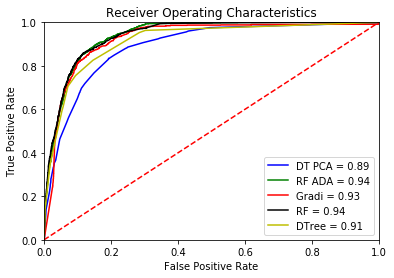

In [247]:
plt.title('Receiver Operating Characteristics')
plt.plot(fpr_dt_pca, tpr_dt_pca, 'b', label='DT PCA = %0.2f' % roc_auc_dt_pca)
plt.plot(fpr_rf_ada, tpr_rf_ada, 'g', label='RF ADA = %0.2f' % roc_auc_rf_ada)
plt.plot(fpr_grad, tpr_grad, 'r', label='Gradi = %0.2f' % roc_auc_grad)
plt.plot(fpr_rf_clf, tpr_rf_clf, 'k', label='RF = %0.2f' % roc_auc_rf_clf)
plt.plot(fpr_dt_clf, tpr_dt_clf, 'y', label='DTree = %0.2f' % roc_auc_dt_clf)

plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Since all the algorithms are performing similarly, we observe AUC for better model.
From the above ROC Curve, we see that random forest with adaptive boosting and random forest are the best.
Ensemble methods are difficult to interpret. Therefore for the sake of interpretability I'm choosing random forest as the top performing model. 